<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:50%"><img src='https://www.np.edu.sg/images/default-source/edm/schools-logos/ict-logo-full-colour.jpg'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 (Problem 1) - Sentiment Analysis Model </h2</th>
    </tr>
</table>

In [1]:
# Import the Required Packages
import pandas as pd
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dense, Flatten
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
from keras.layers import Embedding


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [2]:
df=pd.read_csv('sonic_reviews.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,7580cee0-5fa8-49a7-9680-7166a48cb94f,star hernandez,https://play-lh.googleusercontent.com/a-/AD5-W...,I love sonic alot and being able to play it ag...,5,0,3.8.1,2023-01-21 08:34:58,NaN,NaN
1,aac37283-c39a-4bfe-8ee3-0be29241b74d,один пять-,https://play-lh.googleusercontent.com/a-/AD5-W...,I remember seeing this game on store shelves a...,4,0,3.8.1,2023-01-21 05:05:30,NaN,NaN
2,60b7c980-1479-4d2d-a8af-96f6bf1f84d8,Antonio Flores,https://play-lh.googleusercontent.com/a-/AD5-W...,Good,5,0,3.8.1,2023-01-20 22:41:53,NaN,NaN
3,436fb8ba-d594-423c-8dad-0494b09303c3,Scorpion Hitam,https://play-lh.googleusercontent.com/a/AEdFTp...,I like sonic 1,5,0,3.8.1,2023-01-20 21:11:13,NaN,NaN
4,781a39e1-29eb-4976-9241-a6e42d1e2238,R Praveena,https://play-lh.googleusercontent.com/a-/AD5-W...,I like this game but I can't become super sonic!,4,0,3.8.1,2023-01-20 19:16:39,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              32769 non-null  object
 1   userName              32769 non-null  object
 2   userImage             32769 non-null  object
 3   content               32762 non-null  object
 4   score                 32769 non-null  int64 
 5   thumbsUpCount         32769 non-null  int64 
 6   reviewCreatedVersion  15797 non-null  object
 7   at                    32769 non-null  object
 8   replyContent          141 non-null    object
 9   repliedAt             141 non-null    object
dtypes: int64(2), object(8)
memory usage: 2.5+ MB


In [4]:
df.describe()

,score,thumbsUpCount
count,32769.000000,32769.000000
mean,3.955537,2.876102
std,1.558846,31.173374
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,2031.000000


In [5]:
df.isnull().mean() # no missing values

reviewId                0.000000
userName                0.000000
userImage               0.000000
content                 0.000214
score                   0.000000
thumbsUpCount           0.000000
reviewCreatedVersion    0.517929
at                      0.000000
replyContent            0.995697
repliedAt               0.995697
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              32769 non-null  object
 1   userName              32769 non-null  object
 2   userImage             32769 non-null  object
 3   content               32762 non-null  object
 4   score                 32769 non-null  int64 
 5   thumbsUpCount         32769 non-null  int64 
 6   reviewCreatedVersion  15797 non-null  object
 7   at                    32769 non-null  object
 8   replyContent          141 non-null    object
 9   repliedAt             141 non-null    object
dtypes: int64(2), object(8)
memory usage: 2.5+ MB


In [7]:
#only getcontent and score
df.drop(['userName','reviewCreatedVersion','replyContent','repliedAt','userImage','reviewId','thumbsUpCount','at'],axis=1,inplace=True)
df.head(5)

,content,score
0,I love sonic alot and being able to play it ag...,5
1,I remember seeing this game on store shelves a...,4
2,Good,5
3,I like sonic 1,5
4,I like this game but I can't become super sonic!,4


### 1.2 Data Processing


In [10]:
#remove handful of blanks
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32762 entries, 0 to 32768
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  32762 non-null  object
 1   score    32762 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 767.9+ KB


In [11]:
df.isnull().mean() # no missing values

content    0.0
score      0.0
dtype: float64

In [12]:
def remove_emojis(text):
    return re.sub(r"[^\w\s]", "", text)

# Apply the function to the text column
df['content'] = df['content'].apply(remove_emojis)

df

,content,score
0,I love sonic alot and being able to play it ag...,5
1,I remember seeing this game on store shelves a...,4
2,Good,5
3,I like sonic 1,5
4,I like this game but I cant become super sonic,4
...,...,...
32764,Best SEGA game ever Thanks Sega for making thi...,5
32765,This is just as great as the original classic,5
32766,Gotta go fasttttt,5
32767,AM buyed sonic games on play store,1


In [13]:
def keep_only_alphabets(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

# Apply the function to the 'text' column
df['content'] = df['content'].apply(keep_only_alphabets)

In [14]:
# Convert the content and scores into numeric tensors
# Define the column to be converted
column_name = "content"

# Define the maximum number of words in the vocabulary
vocab_size = 15000
max_length=200
# Create a tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')

# Fit the tokenizer on the column
tokenizer.fit_on_texts(df[column_name])

# Tokenize the column
text_tokens = tokenizer.texts_to_sequences(df[column_name])

# Pad the sequences
text_tokens = pad_sequences(text_tokens, maxlen=max_length, padding='post', truncating='post')


In [15]:
text_tokens.shape

(32762, 200)

In [16]:
y= df['score']
y

0        5
1        4
2        5
3        5
4        4
        ..
32764    5
32765    5
32766    5
32767    1
32768    5
Name: score, Length: 32762, dtype: int64

Encoding the target variable (score) using one-hot-encoding so that we are able to use categorical crossentropy to predict the output.

In [17]:
ratings = y

# Number of unique labels (in this case, 5)
num_labels = 5

# Create an empty array with the same length as the ratings list
encoded_ratings = np.zeros((len(ratings), num_labels))

# Iterate through the ratings list
for i, rating in enumerate(ratings):
    # Set the corresponding column for the current rating to 1
    encoded_ratings[i, rating-1] = 1

print(encoded_ratings.shape)

(32762, 5)


In [18]:
encoded_ratings

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

### 1.3 Data Sampling

In [19]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tokens, encoded_ratings, test_size=0.2)

In [20]:
X_train.shape

(26209, 200)

## Step 2 – Develop a Sentiment Analysis Model

### Model #1 
Base model with no layers

In [27]:
# Step 4: Model training
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_length))
#model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           480000    
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 5)                 32005     
                                                                 
Total params: 512,005
Trainable params: 512,005
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
656/656 [==============================] - 5s 7ms/step - loss: 0.9224 - acc: 0.6908 - val_loss: 0.8406 - val_acc: 0.7249
Epoch 2/10
656/656 [==============================] - 4s 6ms/step - loss: 0.7895 - acc: 0.7414 - val_loss: 0.7886 - val_acc: 0.7377
Epoch 3/10
656/656 [==============================] - 4s 6ms/step - loss: 0.7444 - acc: 0.7565 - val_loss: 0.8057 - val_acc: 0.7386
Epoch 4/10
656/656 [==============================] - 4s 6ms/step - loss: 0.7139 - acc: 0.7663 - val_loss: 0.7852 - val_acc: 0.7470
Epoch 5/10
656/656 [==============================] - 4s 6ms/step - loss: 0.6842 - acc: 0.7806 - val_loss: 0.7864 - val_acc: 0.7467
Epoch 6/10
656/656 [==============================] - 4s 6ms/step - loss: 0.6531 - acc: 0.7929 - val_loss: 0.8042 - val_acc: 0.7451
Epoch 7/10
656/656 [==============================] - 4s 6ms/step - loss: 0.6234 - acc: 0.8027 - val_loss: 0.8087 - val_acc: 0.7463
Epoch 8/10
656/656 [==============================] - 4s 6ms/step - loss: 0.

In [1]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

In [30]:
# Save the Model
model.save('text_model_1_v1.h5')

In [31]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: ", scores[1])

205/205 [==============================] - 0s 2ms/step - loss: 0.8523 - acc: 0.7377
Accuracy:  0.7376773953437805


In [32]:
# Step 4: Model training
from keras.layers import Embedding, GRU, Dense

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_length))
model.add(GRU(4,return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           480000    
                                                                 
 gru (GRU)                   (None, 200, 4)            456       
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 4005      
                                                                 
Total params: 484,461
Trainable params: 484,461
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
656/656 [==============================] - 67s 97ms/step - loss: 0.9256 - acc: 0.6909 - val_loss: 0.8255 - val_acc: 0.7301
Epoch 2/10
656/656 [==============================] - 68s 103ms/step - loss: 0.8099 - acc: 0.7365 - val_loss: 0.8002 - val_acc: 0.7377
Epoch 3/10
656/656 [==============================] - 84s 128ms/step - loss: 0.7730 - acc: 0.7465 - val_loss: 0.7857 - val_acc: 0.7430
Epoch 4/10
656/656 [==============================] - 87s 133ms/step - loss: 0.7484 - acc: 0.7526 - val_loss: 0.8138 - val_acc: 0.7396
Epoch 5/10
656/656 [==============================] - 86s 131ms/step - loss: 0.7329 - acc: 0.7567 - val_loss: 0.7798 - val_acc: 0.7438
Epoch 6/10
656/656 [==============================] - 86s 132ms/step - loss: 0.7191 - acc: 0.7634 - val_loss: 0.7732 - val_acc: 0.7484
Epoch 7/10
656/656 [==============================] - 82s 125ms/step - loss: 0.7096 - acc: 0.7654 - val_loss: 0.7796 - val_acc: 0.7449
Epoch 8/10
656/656 [==============================] - 82

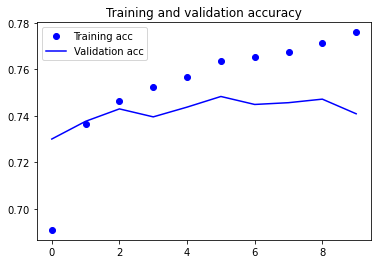

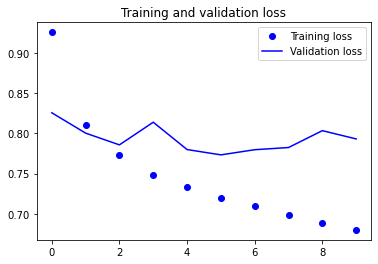

In [34]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: ", scores[1])

205/205 [==============================] - 3s 15ms/step - loss: 0.7770 - acc: 0.7455
Accuracy:  0.7454600930213928


In [36]:
model.save('text_model_1_v2.h5')

In [37]:
# Version three - with increased dropout
#dropout layers - did not improve sowe will stick with v2 as our best model.

In [38]:
# Step 4: Model training
from keras.layers import Embedding, GRU, Dense

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_length))
model.add(GRU(4,return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           480000    
                                                                 
 gru_1 (GRU)                 (None, 200, 4)            456       
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 4005      
                                                                 
Total params: 484,461
Trainable params: 484,461
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
656/656 [==============================] - 71s 104ms/step - loss: 0.9402 - acc: 0.6855 - val_loss: 0.8966 - val_acc: 0.7114
Epoch 2/10
656/656 [==============================] - 82s 125ms/step - loss: 0.8271 - acc: 0.7297 - val_loss: 0.8305 - val_acc: 0.7261
Epoch 3/10
656/656 [==============================] - 98s 150ms/step - loss: 0.7905 - acc: 0.7420 - val_loss: 0.7896 - val_acc: 0.7402
Epoch 4/10
656/656 [==============================] - 85s 130ms/step - loss: 0.7680 - acc: 0.7474 - val_loss: 0.7902 - val_acc: 0.7417
Epoch 5/10
656/656 [==============================] - 80s 122ms/step - loss: 0.7531 - acc: 0.7527 - val_loss: 0.7908 - val_acc: 0.7432
Epoch 6/10
656/656 [==============================] - 85s 129ms/step - loss: 0.7439 - acc: 0.7565 - val_loss: 0.7796 - val_acc: 0.7438
Epoch 7/10
656/656 [==============================] - 82s 125ms/step - loss: 0.7333 - acc: 0.7591 - val_loss: 0.7848 - val_acc: 0.7449
Epoch 8/10
656/656 [==============================] - 8

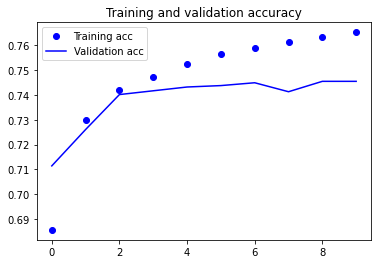

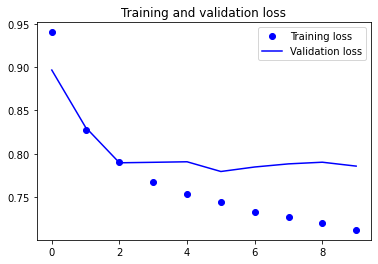

In [40]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
# Save the Model
model.save('text_model_1_v3.h5')#best model so far

In [42]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: ", scores[1])

205/205 [==============================] - 3s 15ms/step - loss: 0.7668 - acc: 0.7444
Accuracy:  0.7443918585777283


### Model #2 

In [43]:
# Build the Model
import numpy as np

# Load the pre-trained embeddings
embeddings_index = {}
with open('glove.6B.300d.txt',encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [44]:
len(tokenizer.word_index.items())

14908

In [45]:
vocab_size=15000 #( 14908-1

embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [46]:
embedding_matrix.shape

(15000, 300)

In [47]:
#Model 2 Version 1

model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(GRU(4))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()
history=model.fit(X_train, y_train, epochs=10, batch_size=32,validation_split=0.2)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 300)          4500000   
                                                                 
 gru_2 (GRU)                 (None, 4)                 3672      
                                                                 
 flatten_3 (Flatten)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 5)                 25        
                                                                 
Total params: 4,503,697
Trainable params: 3,697
Non-trainable params: 4,500,000
_________________________________________________________________
Epoch 1/10
656/656 [==============================] - 98s 142ms/step - loss: 1.1896 - acc: 0.6273 - val_loss: 1.1236 - val_acc: 0.6269
Epoch 2/10
656/656 [=================

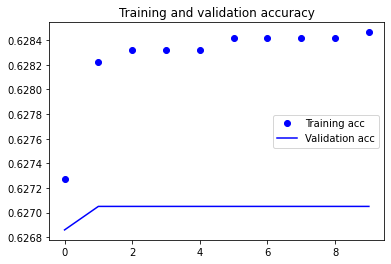

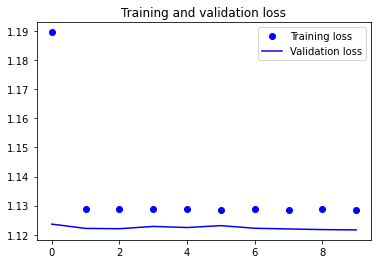

In [48]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
model.save('text_model_2_v1.h5')

In [51]:
#model2 version 2
# Build the model
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(GRU(4,return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 300)          4500000   
                                                                 
 gru_3 (GRU)                 (None, 200, 4)            3672      
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 4005      
                                                                 
Total params: 4,507,677
Trainable params: 7,677
Non-trainable params: 4,500,000
_________________________________________________________________


In [52]:
# Train the Model
history=model.fit(X_train, y_train, epochs=10, batch_size=32,validation_split=0.2)


Epoch 1/10
656/656 [==============================] - 155s 221ms/step - loss: 0.9578 - acc: 0.6774 - val_loss: 0.8790 - val_acc: 0.7142
Epoch 2/10
656/656 [==============================] - 139s 211ms/step - loss: 0.8640 - acc: 0.7167 - val_loss: 0.8218 - val_acc: 0.7291
Epoch 3/10
656/656 [==============================] - 142s 216ms/step - loss: 0.8416 - acc: 0.7217 - val_loss: 0.8119 - val_acc: 0.7327
Epoch 4/10
656/656 [==============================] - 137s 208ms/step - loss: 0.8265 - acc: 0.7284 - val_loss: 0.7969 - val_acc: 0.7379
Epoch 5/10
656/656 [==============================] - 144s 219ms/step - loss: 0.8179 - acc: 0.7303 - val_loss: 0.7959 - val_acc: 0.7379
Epoch 6/10
656/656 [==============================] - 150s 229ms/step - loss: 0.8153 - acc: 0.7316 - val_loss: 0.8013 - val_acc: 0.7346
Epoch 7/10
656/656 [==============================] - 149s 227ms/step - loss: 0.8060 - acc: 0.7326 - val_loss: 0.8172 - val_acc: 0.7352
Epoch 8/10
656/656 [============================

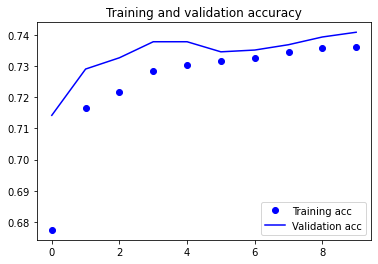

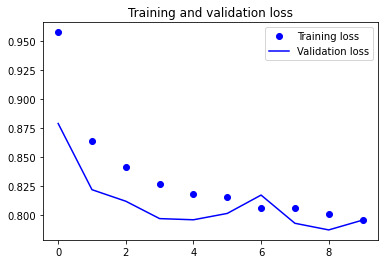

In [53]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
# Save the Model
# we can see a relatively good fit
model.save('text_model_2_v2.h5')

In [55]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: ", scores[1])

205/205 [==============================] - 9s 44ms/step - loss: 0.7876 - acc: 0.7383
Accuracy:  0.7382878065109253


## Step 3 – Evaluate the Model using Testing Data

In [23]:
# Model #1 (replicate where necessary for other models)
model1 = keras.models.load_model('text_model_1_v2.h5')
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('test acc:', test_acc,'test loss:', test_loss)

205/205 [==============================] - 4s 15ms/step - loss: 0.7205 - acc: 0.7613
test acc: 0.7613306641578674 test loss: 0.7205145359039307


In [24]:
# Model #2 (replicate where necessary for other models)
model2 = keras.models.load_model('text_model_2_v2.h5')
test_loss, test_acc = model2.evaluate(X_test, y_test)
print('test acc:', test_acc,'test loss:', test_loss)

205/205 [==============================] - 5s 22ms/step - loss: 0.7826 - acc: 0.7420
test acc: 0.741950273513794 test loss: 0.7826244831085205


In [ ]:
# Save the Best Model
#model.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction

In [25]:
model = keras.models.load_model('text_model_1_v2.h5')

In [26]:
#takes the user input
# convert the user input into numeric tensor
text_input = np.array([input()])
text_input= tokenizer.texts_to_sequences(text_input)
text_input=np.array(text_input)
text_input=pad_sequences(text_input,maxlen=200, padding='post', truncating='post')
text_input=text_input.reshape((text_input.shape[0],text_input.shape[1],1))
print(text_input.shape)
# show the model output using predict function

def prediction(model, text_input, items_l):
    prob = model.predict(np.array(text_input))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

sent=[1,2,3,4,5]
prob_df, result = prediction(model, text_input, sent)
print('The sentiment is: ', result, '\n\n', prob_df)
#prediction=model.predict(np.array(text_input))
#print(prediction)

very good game. my favourite and the best out of all the sonic games.
(1, 200, 1)
1/1 [==============================] - 0s 412ms/step
The sentiment is:  5 

          1         2         3         4         5
0  0.00029  0.000778  0.005203  0.069734  0.923994
